<a href="https://colab.research.google.com/github/monica282/PUCRio/blob/main/MVP_1_Fluorescencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistema de Determinação de agrotóxicos**
Calibração de Biossensores Moleculares

***Dominio de dados: Biologia, Química.***

**PROBLEMA**

Este projeto trata da dificuldade em analisar resíduos de agrotóxicos nos diferentes elos da cadeia produtiva do AGRO (produção de fibras, alimentos e energia). Atualmente isto é feito através de análises caras e demoradas. Esta dificuldade provoca a inviabilidade da rastreabilidade química gerando grande lacuna de informação, falta de transparência e desconfiança do mercado. 
É necessário uma solução de análise realizada de forma mais simples, de baixo custo e com resultados gerados de forma ágil dentro do tempo em que esta informaçao é realmente útil para a cadeia produtiva e de valor.


**1.1.	Premissas ou hipóteses**

Para isso, métodos de análise simples que possam ser realizados on farm são estratégicos. 
Aqui propomos um MVP cujo objetivo final (MVP3) seja o desenvolvimento de um sistema de calibração de um método de análise de agrotóxicos baseados no sinal de emissão de fluorescência das amostras de água analisadas. A hipótese é de que a intensidade do sinal de fluorescência de sondas moleculares (medidas em determinados comprimentos de onda) se relacionem com a presença e a quantidade de agrotóxicos nas amostras analisadas. Por isso este projeto considera um problema de aprendizado supervisionado já que neste dataset cada medida de fluorescência terá como saída conhecida determinada concentração de agrotóxico.


**1.2. Quais as perguntas?**

Nesta fase em que sabemos pouco da caracteristica do dataset o objetivo é responder perguntas que indiquem padrões de comportamento das medidas de fluorescência em função da concentração de agrotóxico nas amostras de água.
Tais padrões também podem indicar outras especificidades que possam ser exploradas em modelos de calibração multivariada. Para esse tipo de calibração busca-se que um conjunto de variáveis (atributos) tenham correlação entre si e com a variável de saída (concentração). 

- Qual a distribuição dos dados de fluorescência? Isso vai definir a forma de tratá-los estatisticamente.
- Quais os comprimentos de onda onde as medidas de fluorescência possuem correlação com a concentração de agrotóxico (saída)?
- Existe correlação entre as medidas nos diferentes comprimentos de onda?
- Existe outras especificidades de tais medidas de fluorescência?
- E em se encontrando resposta a essas perguntas, o comportamento estatistico deste conjunto de observações indica um evento físico-químico que explique este comprtamento especial? Para se evitar relações espúrias.
- Qual a dirpersão desses dados? Uma grande dispersão pode indicar baixa acurácia quando um modelo for usado para calibração de análises químicas. 

**1.3.	Que restrições ou condições foram impostas para selecionar os dados**

Este dataset foi gerado a partir de medidas experimentais realizadas em laboratório em sistemas analíticos contendo amostra + agrotóxico (concentração conhecida) + sonda fluorescente. Tais medidas foram realizadas em 4 comprimentos de onda. Os experimentos foram realizados em dias diferentes e as medidas realizadas em equipamentos diferentes por analistas diferentes. As amostras de água foram ‘contaminadas’ em laboratório com o agrotóxico previamente às medições.


**1.4.	 Defina cada um dos atributos do dataset**

***Nome do dataset***: dataF1

***no de amostras***: código de identificação das amostras

***Fluorescência (comprimento de onda 340 nm)*** – intensidade de emissão de fluorescência medida no comprimento de onda de 340 nm

***Fluorescência (comprimento de onda 410 nm)*** -intensidade de emissão de fluorescência medida no comprimento de onda de 400 nm

***Fluorescência (comprimento de onda 500 nm)*** - intensidade de emissão de fluorescência medida no comprimento de onda de 500 nm

***Fluorescência (comprimento de onda 570 nm)*** - intensidade de emissão de fluorescência medida no comprimento de onda de 570 nm

***Concentração do agrotóxico ( 0 até 10 ppm)*** - concentração de agrotóxico presente na amostra a ser medida expressa em partes por milhão (ppm).


In [ ]:
# importação do Pandas
import pandas as pd

In [ ]:
# importando dados uma url para um dataframe

# url a importar
url_dados = 'https://docs.google.com/spreadsheets/d/19nSsatqcUsYqmpQFN-uCCD44Tl-nFiukEJJD4MQhfVM/gviz/tq?tqx=out:csv&sheet=dataF1'

# labels dos atributos do dataset
labels_atributos = ['Fluorescência (340 nm)', 'Fluorescência (410 nm)', 'Fluorescência (500 nm)', 'Fluorescência (570 nm)', 'concentração de agrotóxico']

# carga do dataset através da url - há diversos parâmetros no read_csv que podem ser interessantes, como sep, usecols e header
dataF1 = pd.read_csv(url_dados, names=labels_atributos)



In [ ]:
# verificando que iris é um dataframe
type(dataF1)

pandas.core.frame.DataFrame

In [ ]:
# verificando os tipos de cada coluna do dataframe
dataF1.dtypes

Fluorescência (340 nm)        object
Fluorescência (410 nm)        object
Fluorescência (500 nm)        object
Fluorescência (570 nm)        object
concentração de agrotóxico    object
dtype: object

In [ ]:
# exibindo as primeiras linhas
dataF1.head()

,Fluorescência (340 nm),Fluorescência (410 nm),Fluorescência (500 nm),Fluorescência (570 nm),concentração de agrotóxico
No da amostras,Fluorescência ( 340nm),Fluorescência ( 410 nm),Fluorescência ( 500 nm),Fluorescência ( 570 nm),concentração de agrotóxico
1,5468,14967,15536,16297,0
2,5334,14921,14981,17749,0
3,5521,14958,15613,16731,0
4,5388,14959,15390,17830,0


In [ ]:
# exibindo as últimas linhas
dataF1.tail()

,Fluorescência (340 nm),Fluorescência (410 nm),Fluorescência (500 nm),Fluorescência (570 nm),concentração de agrotóxico
338,6457,10002,10965,17918,10
339,5117,10178,10931,16793,10
340,5459,10125,10980,17959,10
341,6414,9963,10986,16353,10
NaN,2000,NaN,NaN,NaN,NaN


In [ ]:
# exibindo os nomes das colunas
dataF1.columns

Index(['Fluorescência (340 nm)', 'Fluorescência (410 nm)',
       'Fluorescência (500 nm)', 'Fluorescência (570 nm)',
       'concentração de agrotóxico'],
      dtype='object')

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [ ]:
# exibindo as dimensões do dataset
dataF1.shape

(343, 5)

In [ ]:
# exibindo a quantidade de linhas por coluna
dataF1.count()

Fluorescência (340 nm)        343
Fluorescência (410 nm)        342
Fluorescência (500 nm)        342
Fluorescência (570 nm)        342
concentração de agrotóxico    342
dtype: int64

**CARGA DO DATASET**

In [ ]:
# Informa a URL de importação do dataset
url = "https://docs.google.com/spreadsheets/d/19nSsatqcUsYqmpQFN-uCCD44Tl-nFiukEJJD4MQhfVM/gviz/tq?tqx=out:csv&sheet=dataF1"

# Lê o arquivo 
dataF1 = pd.read_csv(url, delimiter=',')

In [ ]:
# exibindo um sumário estatístico
dataF1.describe()

,No da amostras,Fluorescência ( 340nm),Fluorescência ( 410 nm),Fluorescência ( 500 nm),Fluorescência ( 570 nm),concentração de agrotóxico
count,341.000000,342.000000,341.000000,341.000000,341.000000,341.000000
mean,171.000000,5480.444444,12552.891496,13376.384164,16934.557185,5.000000
std,98.582453,374.528671,1595.178778,1838.328837,582.488905,3.166925
min,1.000000,2000.000000,9914.000000,10931.000000,15901.000000,0.000000
25%,86.000000,5249.750000,11071.000000,11672.000000,16462.000000,2.000000
50%,171.000000,5420.000000,12544.000000,12546.000000,16936.000000,5.000000
75%,256.000000,5705.500000,14065.000000,15205.000000,17393.000000,8.000000
max,341.000000,6457.000000,14995.000000,15992.000000,17993.000000,10.000000


Pela descrição estatística do dataset (dataF1) identificamos os valores máximos e mínimos de intensidade de fluorescência das sondas nas amostras. Esta é uma informação importante pois mostra a ordem de grandeza das medições e sua amplitude. Esta informação informa sobre a escala de medições dos equipamentos e dá informações sobre a possível sensibilidade do método de calibração da análise. A amplitude entre máximo e mínimo, neste caso é positiva para o método de calibração.

**ANÁLISE EXPLORATÓRIA**

### Informações Gerais e Estatísticas Descritivas

In [ ]:
# Mostra as dimensões do dataset
dataF1.shape

(342, 6)

In [ ]:
# Mostra as informações do dataset
dataF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   No da amostras              341 non-null    float64
 1   Fluorescência ( 340nm)      342 non-null    int64  
 2   Fluorescência ( 410 nm)     341 non-null    float64
 3   Fluorescência ( 500 nm)     341 non-null    float64
 4   Fluorescência ( 570 nm)     341 non-null    float64
 5   concentração de agrotóxico  341 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 16.2 KB


In [ ]:
# Mostra as 10 primeiras linhas do dataset
dataF1.head(10)

,No da amostras,Fluorescência ( 340nm),Fluorescência ( 410 nm),Fluorescência ( 500 nm),Fluorescência ( 570 nm),concentração de agrotóxico
0,1.0,5468,14967.0,15536.0,16297.0,0.0
1,2.0,5334,14921.0,14981.0,17749.0,0.0
2,3.0,5521,14958.0,15613.0,16731.0,0.0
3,4.0,5388,14959.0,15390.0,17830.0,0.0
4,5.0,5080,14966.0,14659.0,16632.0,0.0
5,6.0,5786,14915.0,15838.0,16487.0,0.0
6,7.0,5383,14951.0,15166.0,16234.0,0.0
7,8.0,5599,14943.0,14659.0,17194.0,0.0
8,9.0,5451,14936.0,15296.0,17369.0,0.0
9,10.0,5763,14995.0,14736.0,16765.0,0.0


In [ ]:
#Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataF1.describe()

,No da amostras,Fluorescência ( 340nm),Fluorescência ( 410 nm),Fluorescência ( 500 nm),Fluorescência ( 570 nm),concentração de agrotóxico
count,341.000000,342.000000,341.000000,341.000000,341.000000,341.000000
mean,171.000000,5480.444444,12552.891496,13376.384164,16934.557185,5.000000
std,98.582453,374.528671,1595.178778,1838.328837,582.488905,3.166925
min,1.000000,2000.000000,9914.000000,10931.000000,15901.000000,0.000000
25%,86.000000,5249.750000,11071.000000,11672.000000,16462.000000,2.000000
50%,171.000000,5420.000000,12544.000000,12546.000000,16936.000000,5.000000
75%,256.000000,5705.500000,14065.000000,15205.000000,17393.000000,8.000000
max,341.000000,6457.000000,14995.000000,15992.000000,17993.000000,10.000000


Vamos separar as medidas de fluorescência medidas em cada concentração de agrotóxico presente nas amostras para fazer sentido as informações da descrição estatística. A verificação de classes abaixo confirma o número de medidas para cada concentração de agrotóxico.

In [ ]:
# Verifica a distribuição das classes
dataF1.groupby('concentração de agrotóxico').size()


concentração de agrotóxico
0.0     31
1.0     31
2.0     31
3.0     31
4.0     31
5.0     31
6.0     31
7.0     31
8.0     31
9.0     31
10.0    31
dtype: int64

Como exemplo abaixo estão as medidas de emissão de fluorescência nos diferentes comprimentos de onda para a concentração de zero ppm de agrotóxico. A tabela acima mostra que cada concentração de agrotóxico possui a mesma quantidade de medições. Isso mostra que o dataset está balanceado para este atributo de saída. Abaixo como exemplo mostra-se todas as medições (linhas) para a concentração de zero ppm. 

In [ ]:
# selecionando linhas segundo um critério
dataF1[dataF1['concentração de agrotóxico']<1.0]


,No da amostras,Fluorescência ( 340nm),Fluorescência ( 410 nm),Fluorescência ( 500 nm),Fluorescência ( 570 nm),concentração de agrotóxico
0,1.0,5468,14967.0,15536.0,16297.0,0.0
1,2.0,5334,14921.0,14981.0,17749.0,0.0
2,3.0,5521,14958.0,15613.0,16731.0,0.0
3,4.0,5388,14959.0,15390.0,17830.0,0.0
4,5.0,5080,14966.0,14659.0,16632.0,0.0
5,6.0,5786,14915.0,15838.0,16487.0,0.0
6,7.0,5383,14951.0,15166.0,16234.0,0.0
7,8.0,5599,14943.0,14659.0,17194.0,0.0
8,9.0,5451,14936.0,15296.0,17369.0,0.0
9,10.0,5763,14995.0,14736.0,16765.0,0.0


Nas duas tabelas abaixo estão as médias e desvio padrão (respectivamente) de cada concentração de agrotóxico presente nas amostras.

In [ ]:
# exibindo a média de cada atributo, agrupado por espécie
dataF1.groupby('concentração de agrotóxico').mean()



,No da amostras,Fluorescência ( 340nm),Fluorescência ( 410 nm),Fluorescência ( 500 nm),Fluorescência ( 570 nm)
concentração de agrotóxico,,,,,
0.0,16.0,5506.580645,14944.935484,15260.322581,17122.064516
1.0,47.0,5490.354839,14685.677419,15310.322581,16648.806452
2.0,78.0,5564.806452,14157.032258,15316.225806,17007.354839
3.0,109.0,5506.838710,13624.161290,15216.193548,16974.935484
4.0,140.0,5289.161290,12944.967742,15453.612903,17033.419355
5.0,171.0,5307.387097,12544.258065,12547.774194,16983.612903
6.0,202.0,5311.387097,11951.419355,12212.225806,16947.967742
7.0,233.0,5417.935484,11510.258065,11944.967742,17032.677419
8.0,264.0,5517.225806,11023.612903,11622.967742,16868.806452


In [ ]:
dataF1.groupby('concentração de agrotóxico').std()

,No da amostras,Fluorescência ( 340nm),Fluorescência ( 410 nm),Fluorescência ( 500 nm),Fluorescência ( 570 nm)
concentração de agrotóxico,,,,,
0.0,9.092121,276.498556,23.857823,467.287662,527.376143
1.0,9.092121,309.513764,96.102163,475.719272,604.611413
2.0,9.092121,372.057291,96.587261,443.352584,594.291766
3.0,9.092121,335.592520,83.779909,461.699283,578.287929
4.0,9.092121,183.958709,90.340277,388.007876,540.152804
5.0,9.092121,159.555357,28.081984,25.353119,603.943799
6.0,9.092121,157.109448,27.190408,41.101265,544.008057
7.0,9.092121,215.574416,61.253010,44.041256,544.183142
8.0,9.092121,227.253707,44.674137,44.768653,544.128442


Os desvios em cada comprimento de onda e em cada concentração são pequenos e indicam que tais medidas podem (até esta avaliação) ser usadas para um método de calibração com alta precisão.

In [ ]:
# Correlação de Pearson
dataF1.corr(method = 'pearson')


,No da amostras,Fluorescência ( 340nm),Fluorescência ( 410 nm),Fluorescência ( 500 nm),Fluorescência ( 570 nm),concentração de agrotóxico
No da amostras,1.000000,0.170623,-0.993149,-0.911569,-0.053566,0.995863
Fluorescência ( 340nm),0.170623,1.000000,-0.160110,-0.135951,-0.060292,0.170597
Fluorescência ( 410 nm),-0.993149,-0.160110,1.000000,0.914695,0.046027,-0.997553
Fluorescência ( 500 nm),-0.911569,-0.135951,0.914695,1.000000,0.051092,-0.914972
Fluorescência ( 570 nm),-0.053566,-0.060292,0.046027,0.051092,1.000000,-0.053731
concentração de agrotóxico,0.995863,0.170597,-0.997553,-0.914972,-0.053731,1.000000


As correlações (negativas e positivas) próximas de 1.0 indicam que os atributos deste dataset pode (até aqui) ser usados para contruir um método de calibração que relacione as medidas de fluorescência (de mais de um comprimento de onda) com  a concentração de agrotóxico nas amostras de água.


**Avaliação de valores de MODA** neste caso não dizem muito pois as medidas de fluorescência se baseiam em unidades arbitrárias que podem diferir de um equipamento para o outro. Além disso, mesmo em um mesmo equipamento os sistemas medidas possuem variações naturais de fluorescência o que faz com que um grande conjunto de medidas tenham uma variação numérica em suas medidas sem relevância estatística. Logo, a análise de MODA não diz muito no caso deste tipo de medição. O mesmo valendo para a mediana.



## **VISUALIZAÇÃO**




O tipo de dataset utilizado neste MVP (medidas de fluorescência nas amostras de água em presença de concentrações diferentes de agrotóxicos) procura ser a base para entender o comportamento dessas medidas e da relação fluorescência x conc. agrotóxico.  

**Visualizações Unimodais**

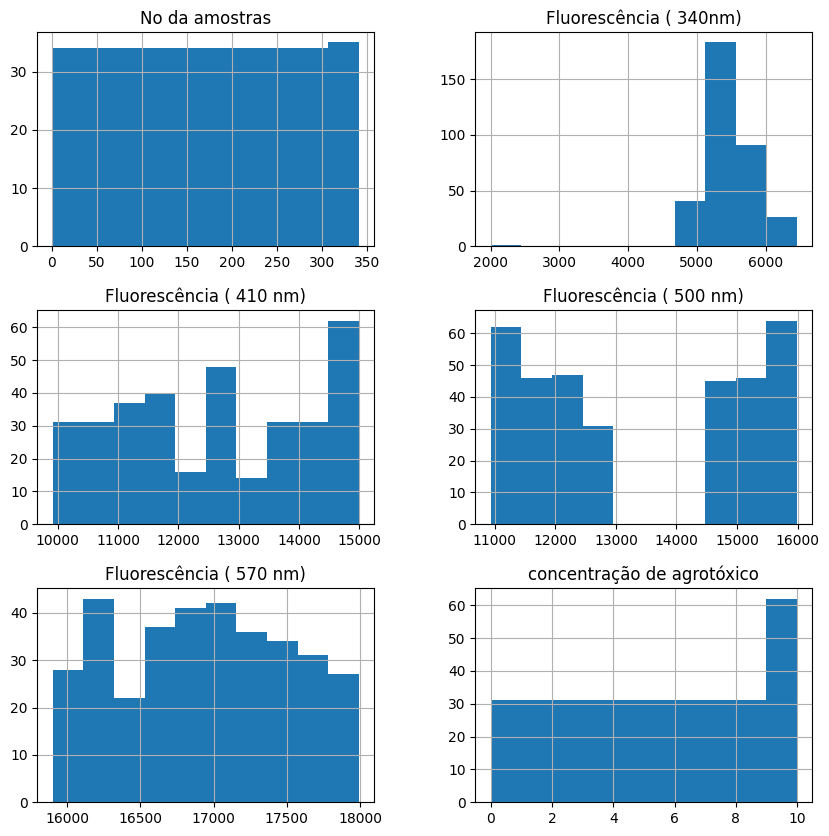

In [ ]:
# Histograma
dataF1.hist(figsize = (10,10))
plt.show()

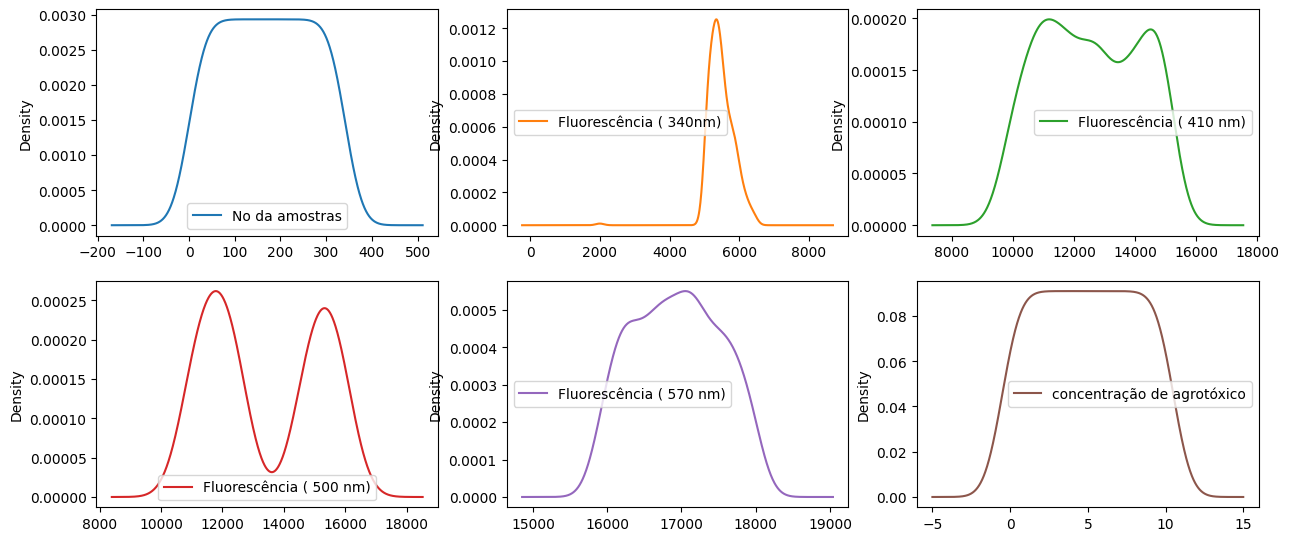

In [ ]:
# Density Plot
dataF1.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

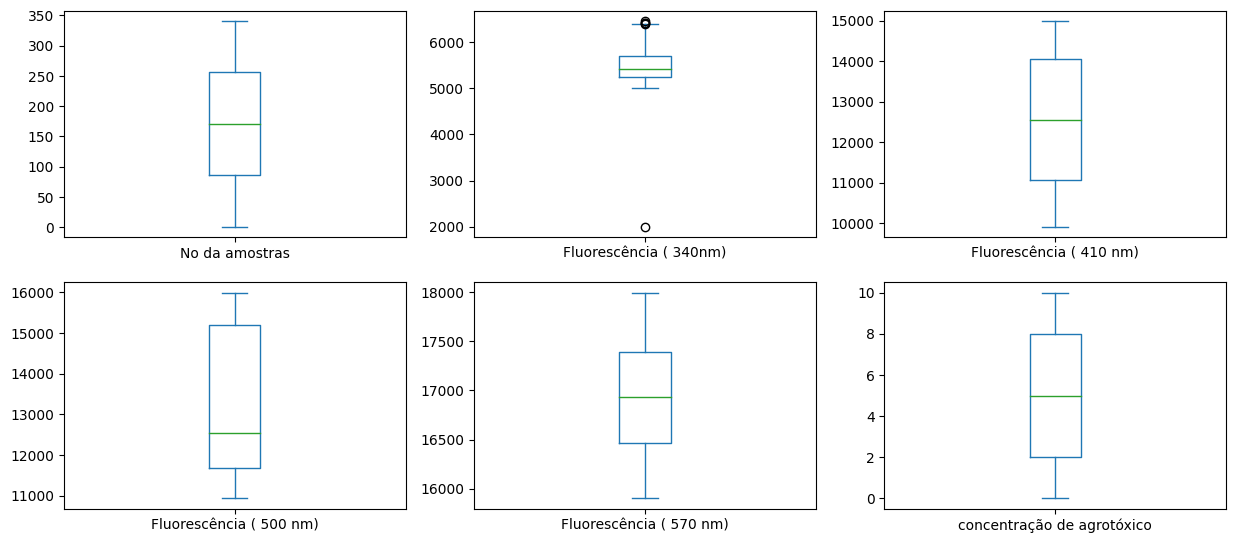

In [ ]:
# Boxplot
dataF1.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

os gráficos acima indicam o comportamento das medidas de fluorescência características de cada comprimento de onda. Para um método de análise química (e seu modelo de calibração) é importante ficar atento aos padrões e diferenças nessas medições. Neste caso, o fato de se observar um intervalo característico  para diferentes comprimentos de onda pode ajudar no desenvolvimento do método de calibração. A diferença dos intervalos dos valores de fluorescência (os valores máximos e mínimos) PODE ser informação importante na estratégia de calibração.Conjunto de dados precisam ter variabilidade (respeitando as suas correlações)  para servirem como modelos de calibração. Pouca variação resulta em baixa sensibilidade do método de determinação. 

**Visualizações Multimodais**

Identificar as possíveis correlações entre as medidas de fluorescência e as concentrações de agrotóxicos presentes nas amostras. Para a connstruçao de um modelo preditivo para, pela fluorescência medida, se determinar as concentrações de agrotóxicos precisamos inicialmente confirmar se existe esta correlação. Correlações positivas e negativas são "bem-vindas".

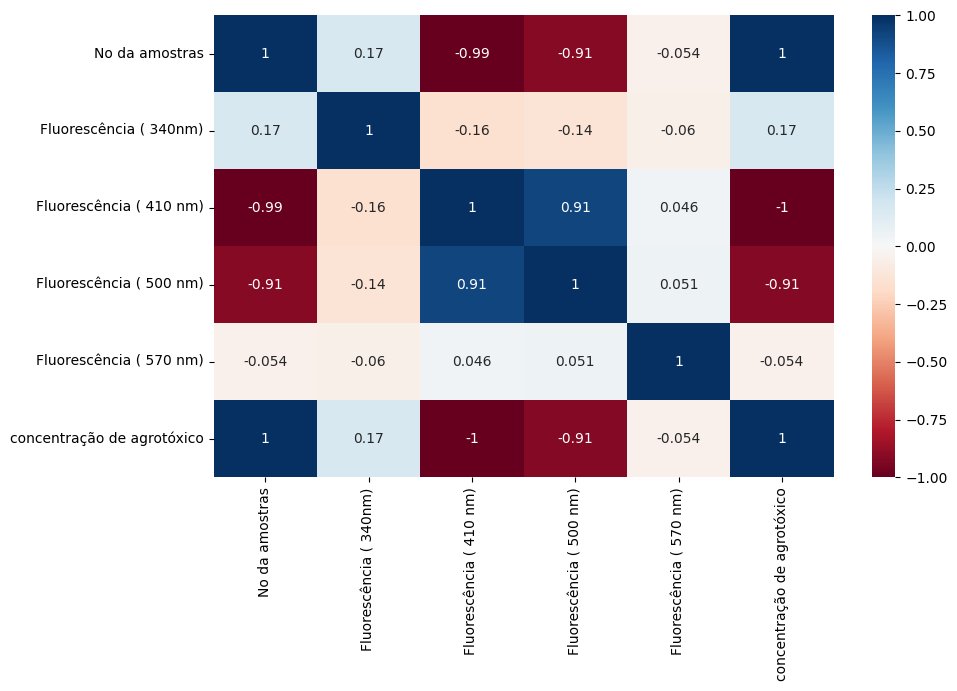

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(dataF1.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Correlações entre as concentrações de agrotóxicos e cada um dos comprimentos de onda são importantes assim como as correlações entre os comprimentos de onda (negativas ou positivas próximas de -1 ou +1, respectivamente). Neste último caso observa-se que modelos multivariados de calibração são possíveis com este comportamento dos dados.

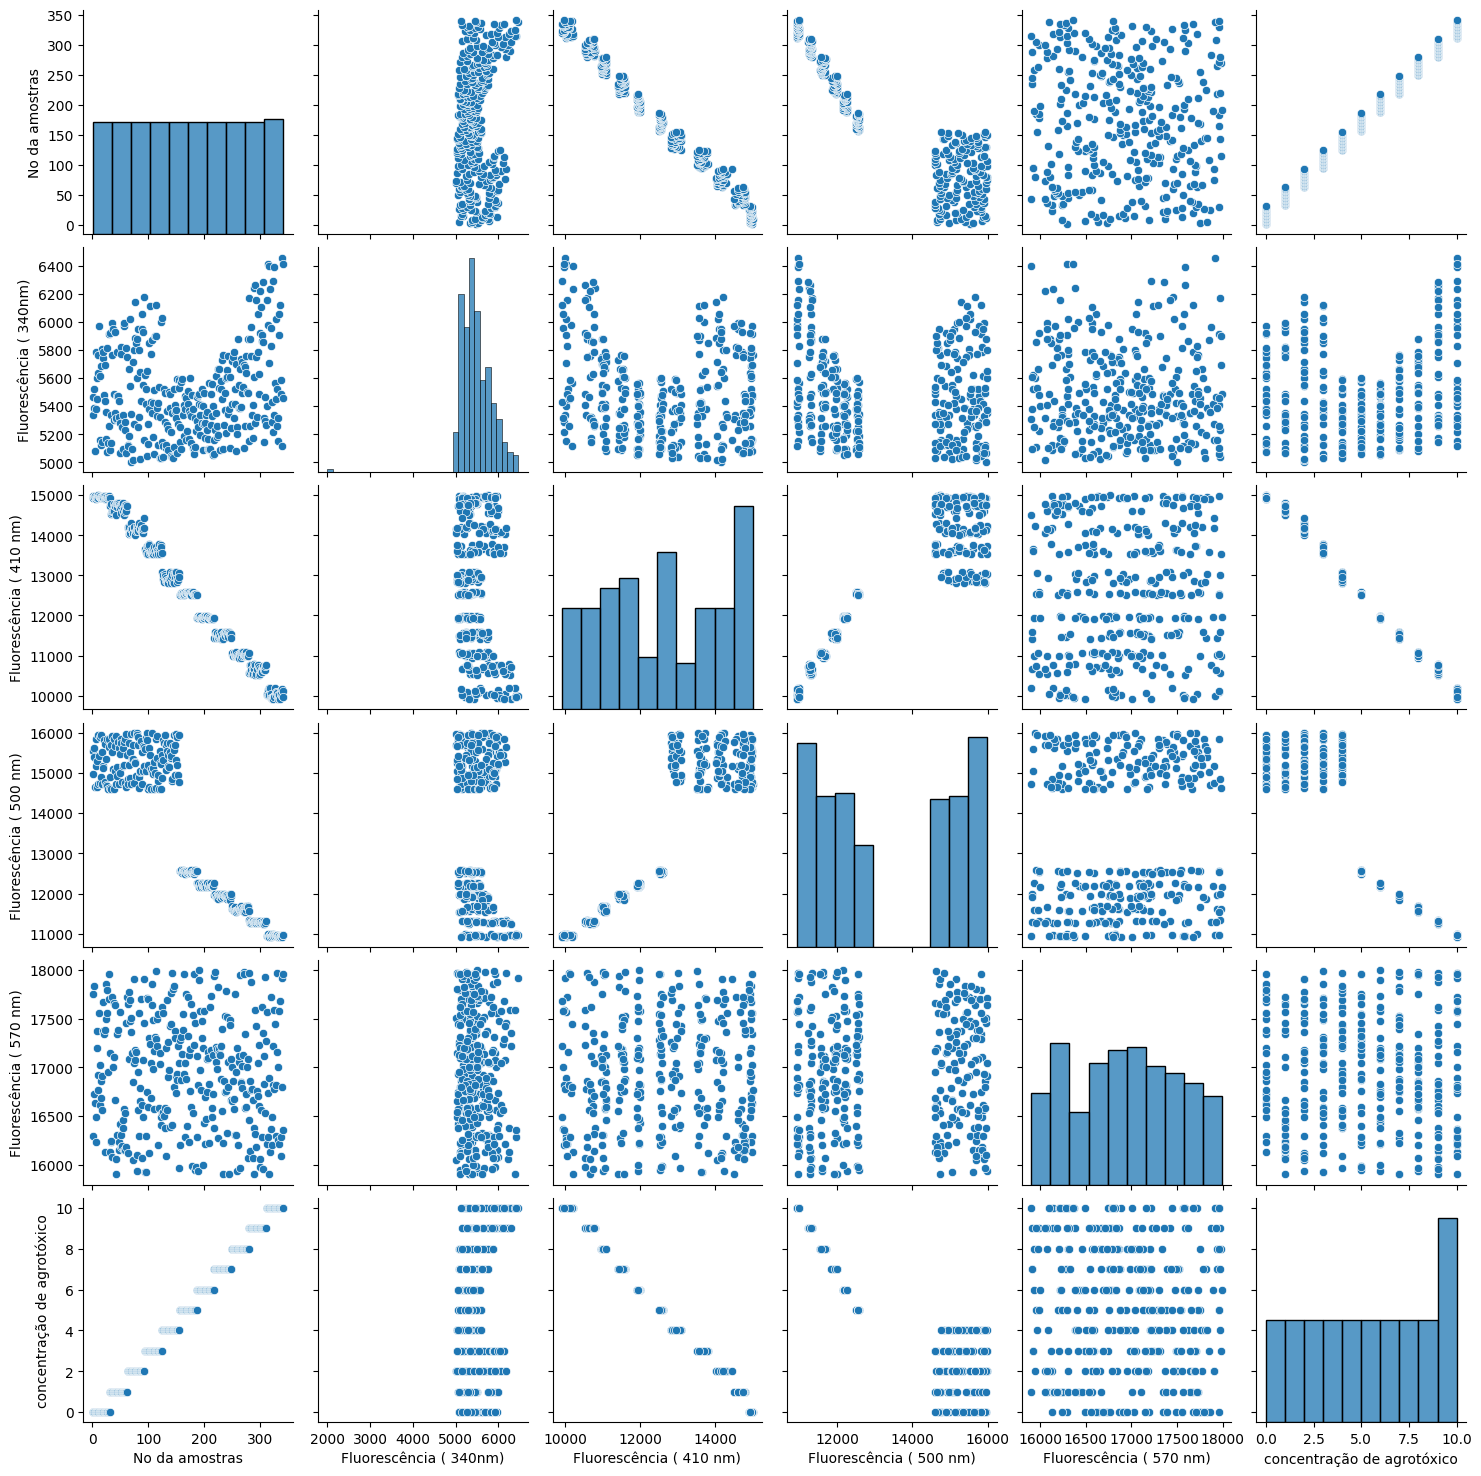

In [ ]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(dataF1)

As concentrações de agrotóxico nas amostras tem forte correlação com as medidas de fluorescência em 410 nm e em 500 nm (este ultimo em uma faixa específica de concentração).

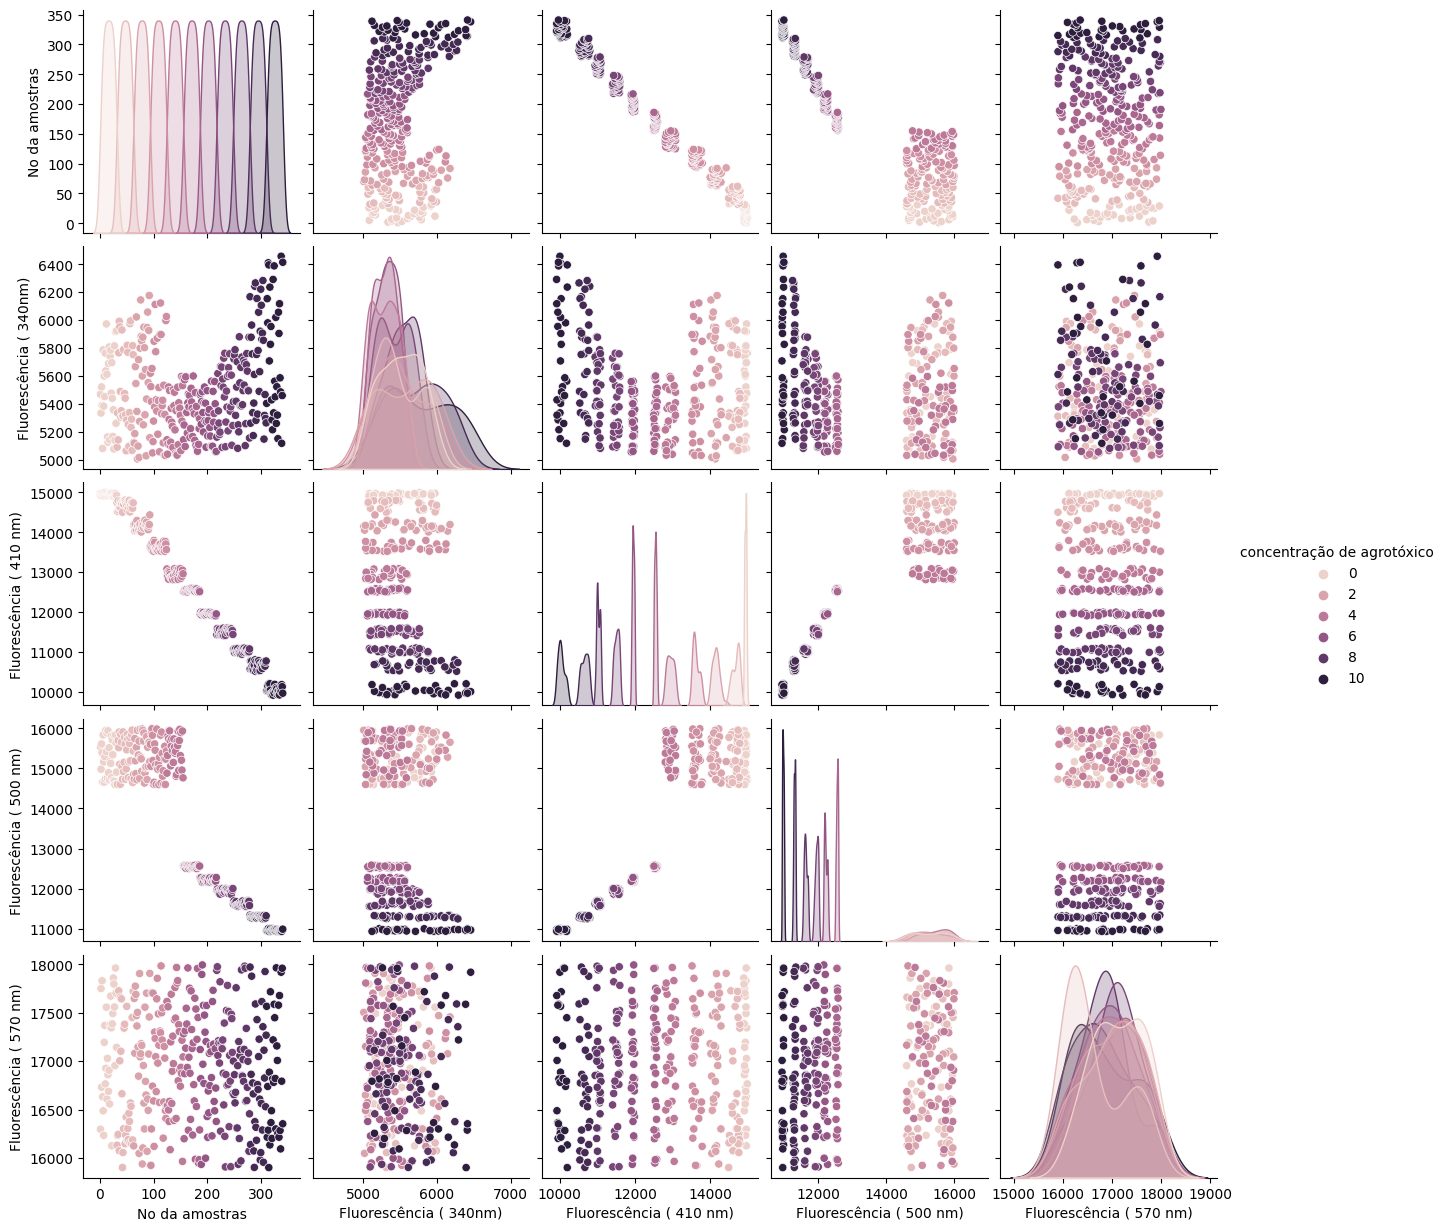

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(dataF1, hue = "concentração de agrotóxico", height = 2.5)

Esta visualização permite mostrar que as maiores concentrações de agrotóxico tem medida de fluorescencia mais baixas (em 410 e 500 nm). Esta observação nos dá pistas dos mecanismos que podem explicar este comportamento e embasar o princípio do método de análise e seu modelo de calibração (evento físico-químico a ser confirmado experimentalmente) eliminando a chance de relações espúrias entre as variáveis e assumindo uma estratégia de modelagem de calibração consistente.

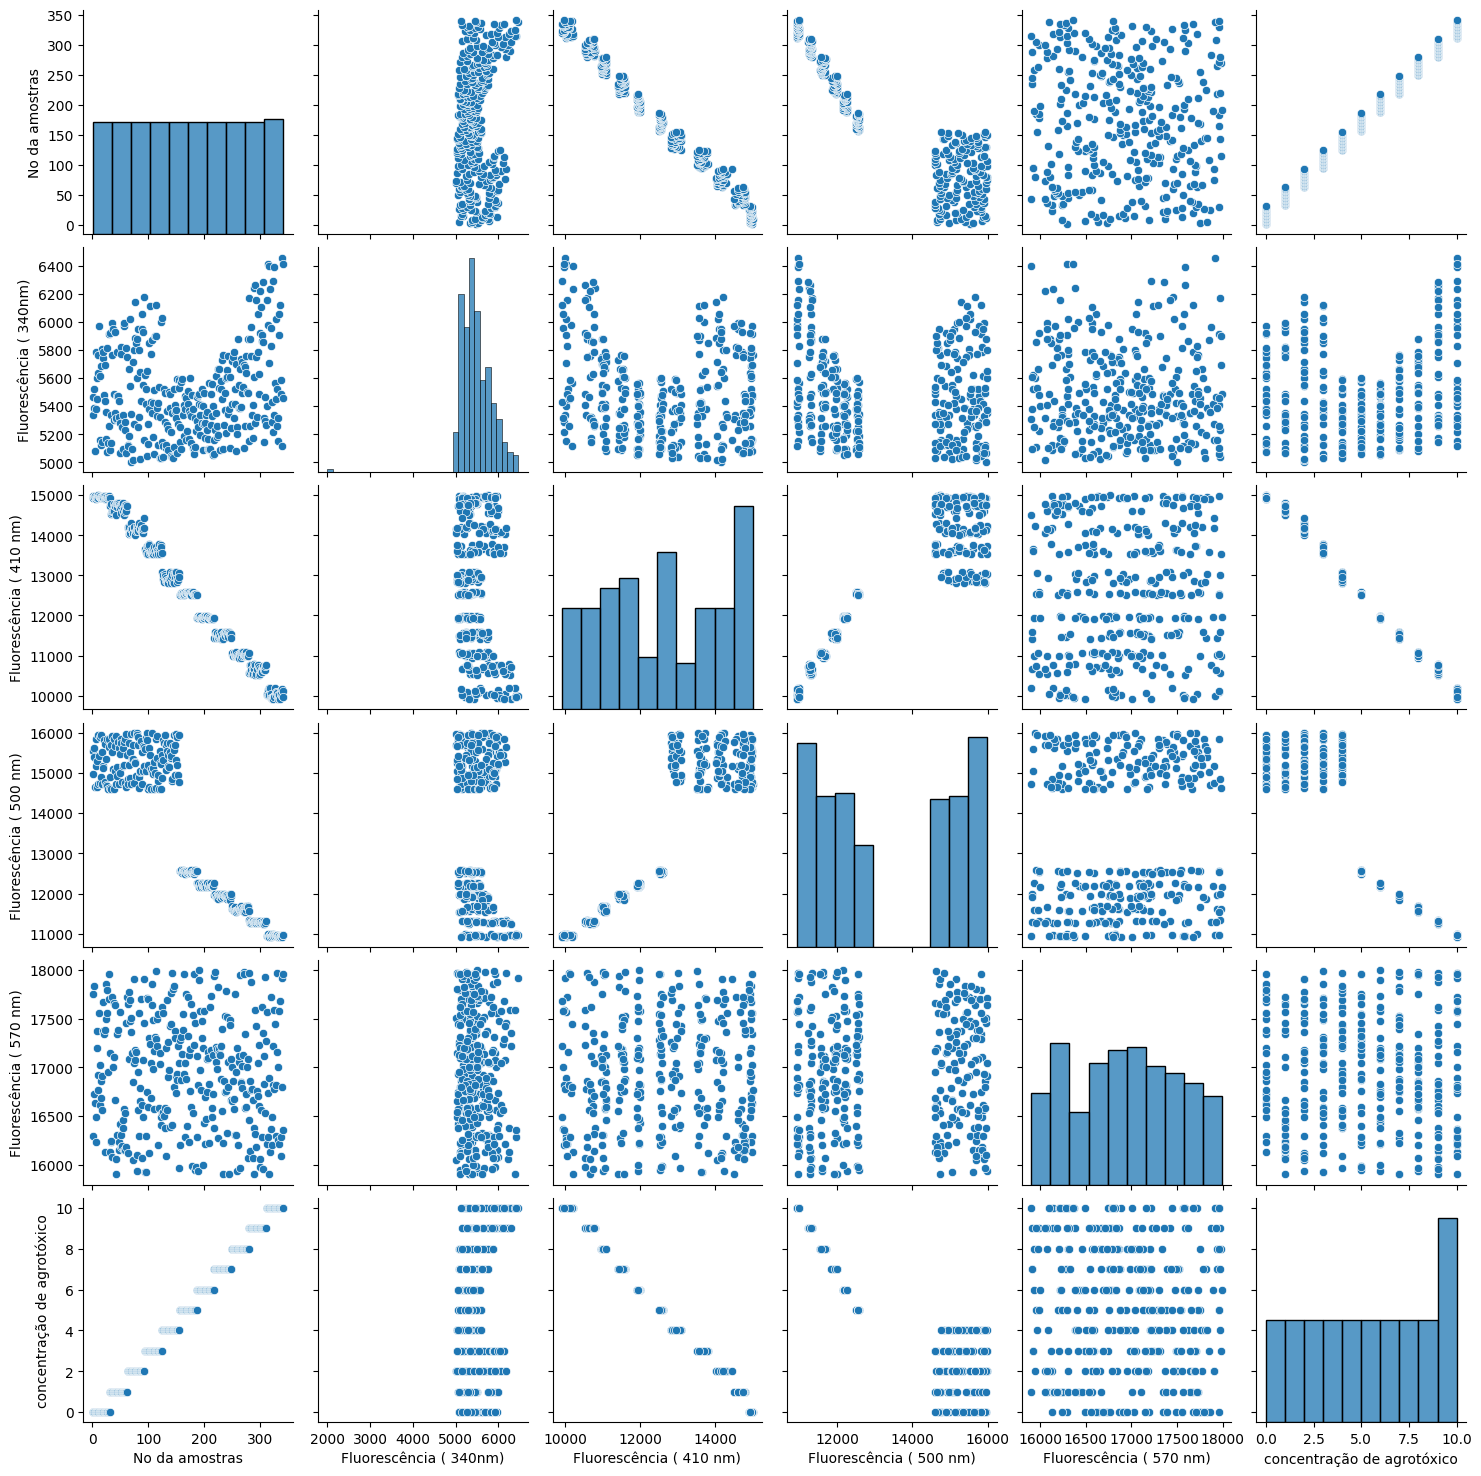

In [ ]:
# pair plot 1 com Seaborn
sns.pairplot(dataF1);

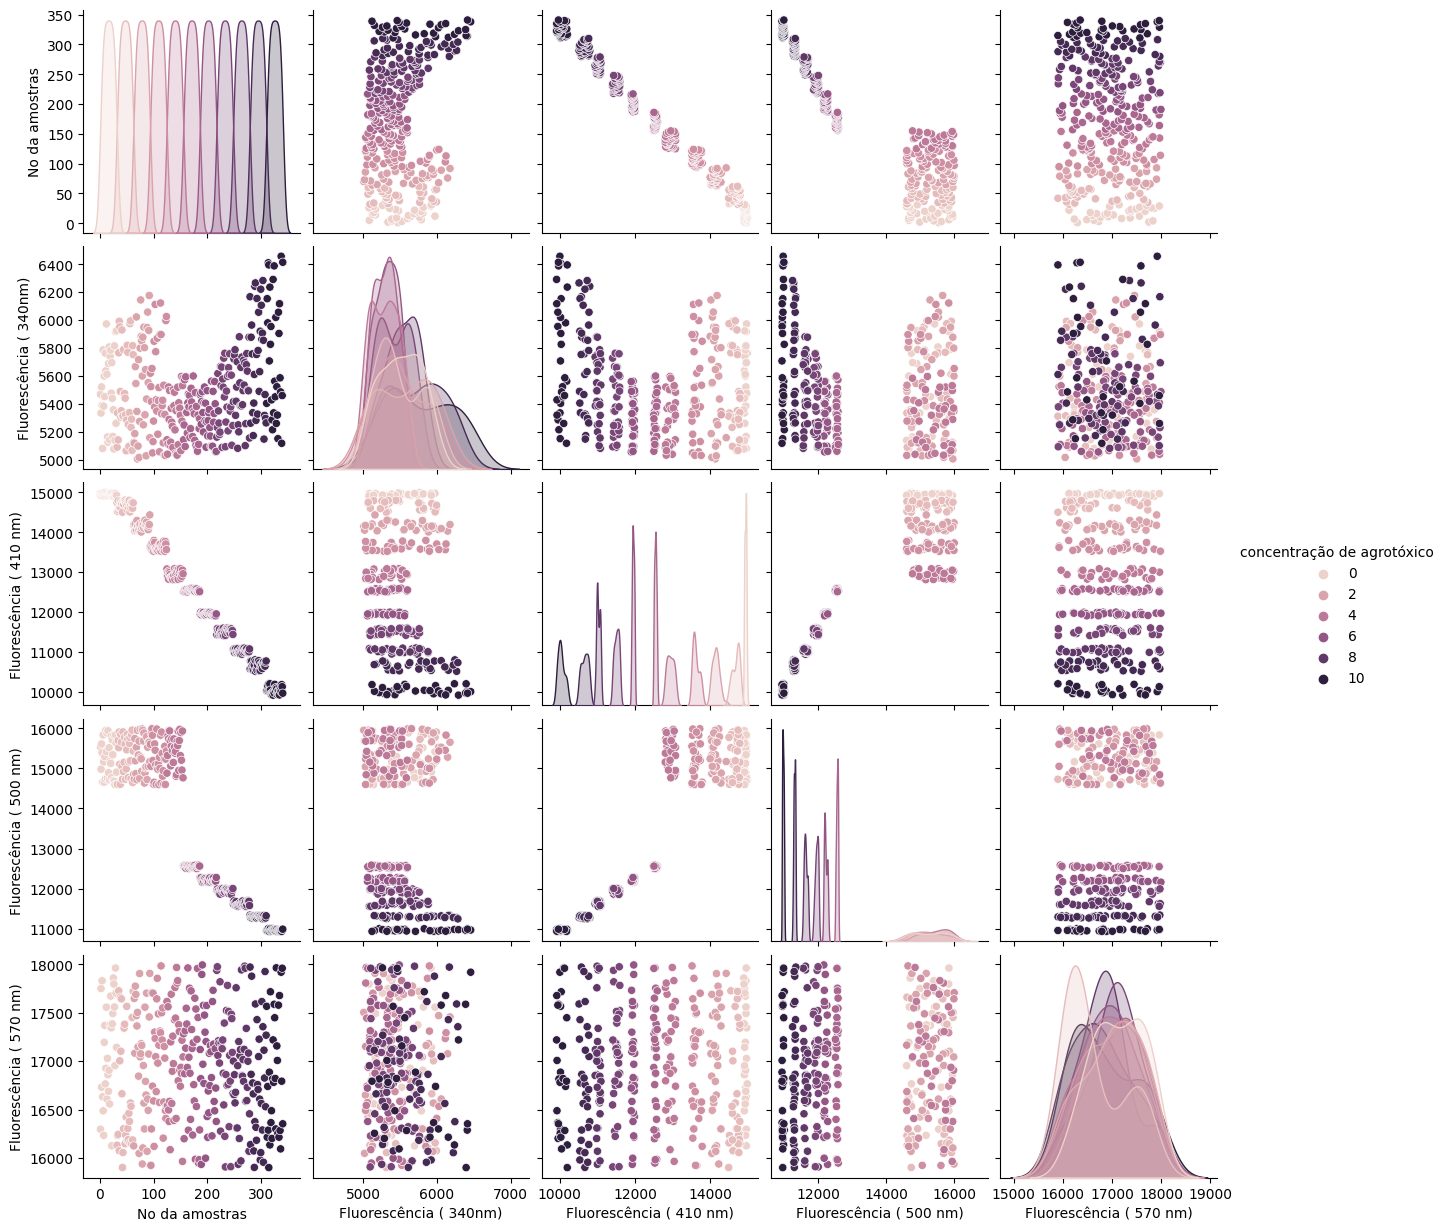

In [ ]:
# pair plot 2 com Seaborn
sns.pairplot(dataF1, hue = "concentração de agrotóxico");

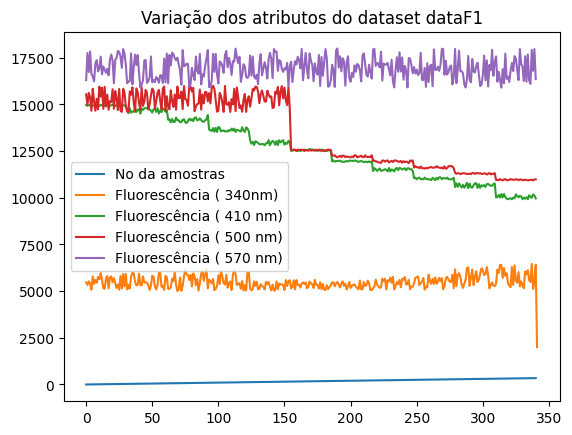

In [ ]:
# Gráfico de Linhas

# selecionando apenas os atributos para serem plotados em um novo dataframe, sem a classe
atributos = dataF1.columns.drop(['concentração de agrotóxico'])

# criando o eixo x - vai de 0 até a quantidade de linhas do dataset dataF1 - de 0 a 149
x_data = range(0, dataF1.shape[0])

# plotando cada atributo
for atributo in atributos: # esse for percorre a lista: ['Fluorescência em 340 nm', 'Fluorescência em 410 nm', 'Fluorescência em 500 nm', 'Fluorescência em 570 nm']
    plt.plot(x_data, dataF1[atributo], label=atributo)
    
# incluindo título do gráfico e legenda
plt.title('Variação dos atributos do dataset dataF1')
plt.legend();

Pelo gráfico de linhas é possível observar a sequencia de todas as medidas de fluorescência. É fácil observar que existe um comportamento com padrão nos comprimentos de onda (410 nm e 500 nm). Apesar de ser necessário mais avaliações já seria indicado excluir atributos irrelevantes (aparentemente) para o modelo de calibração como as medidas de fluorescência em comprimentos de onda de 570 nm, por exemplo.

# **Pré-Processamento de Dados**

In [ ]:
# Importação de pacotes
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import Normalizer # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

In [ ]:
# Informa a URL de importação do dataset
url = "https://docs.google.com/spreadsheets/d/19nSsatqcUsYqmpQFN-uCCD44Tl-nFiukEJJD4MQhfVM/gviz/tq?tqx=out:csv&sheet=dataF1"

# Lê o arquivo 
dataF1 = pd.read_csv(url, delimiter=',')

In [ ]:
# importando dados uma url para um dataframe

# url a importar
url_dados = 'https://docs.google.com/spreadsheets/d/19nSsatqcUsYqmpQFN-uCCD44Tl-nFiukEJJD4MQhfVM/gviz/tq?tqx=out:csv&sheet=dataF1'

# labels dos atributos do dataset
labels_atributos = ['Fluorescência (340 nm)', 'Fluorescência (410 nm)', 'Fluorescência (500 nm)', 'Fluorescência (570 nm)', 'concentração de agrotóxico']

# carga do dataset através da url
dataF1 = pd.read_csv(url_dados, names=labels_atributos)

# exibindo as últimas linhas
dataF1.tail()

,Fluorescência (340 nm),Fluorescência (410 nm),Fluorescência (500 nm),Fluorescência (570 nm),concentração de agrotóxico
338,6457,10002,10965,17918,10
339,5117,10178,10931,16793,10
340,5459,10125,10980,17959,10
341,6414,9963,10986,16353,10
NaN,2000,NaN,NaN,NaN,NaN


**Limpeza - Tratamento de Missings**

Comentário: No caso deste dataset, a melhor estratégia aos valores faltantes é a exclusão da linha. Como este dataset é fruto de uma grande quantidade de experimentos a eliminação de algumas linhas não vai comprometer.  Por isso se retira a ultima linha neestae caso.

In [ ]:
# eliminando linhas que tenham ALGUM valor missing
df = dataF1.dropna(how='any')
df.tail()

,Fluorescência (340 nm),Fluorescência (410 nm),Fluorescência (500 nm),Fluorescência (570 nm),concentração de agrotóxico
337,5485,10046,10955,16094,10
338,6457,10002,10965,17918,10
339,5117,10178,10931,16793,10
340,5459,10125,10980,17959,10
341,6414,9963,10986,16353,10


**Transformações Numéricas**

Considerando que o objetivo aqui é usar esssa dataset para predição usa-se a transcrição do material do curso. "Os problemas de modelagem preditiva são muitas vezes complexos, não sendo clara a melhor transformação para realizar. Na dúvida, use a normalização. Se tiver tempo, explore os modelos com os dados sem transformação, com a padronização e com a normalização e veja se os resultados são significativamente diferentes e se o custo x benefício vale a pena".

**Normalização do dataset original**

In [ ]:
# Normalização

# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# transformando os dados
scaled = scaler.fit_transform(dataF1)
print(scaled)

[[0.         0.77810186 0.99448927 0.90989923 0.18929254 0.        ]
 [0.00294118 0.7480368  0.98543594 0.80023711 0.8833652  0.        ]
 [0.00588235 0.78999327 0.99271797 0.92511361 0.39674952 0.        ]
 ...
 [0.99705882 0.77608257 0.04152726 0.00968188 0.98374761 1.        ]
 [1.         0.99035225 0.00964377 0.01086742 0.21606119 1.        ]
 [       nan 0.                nan        nan        nan        nan]]


**Padronização do dataset original**

In [ ]:
# Padronização

# definindo o transformador como standard scaler
scaler = StandardScaler()

# transformando os dados
scaled = scaler.fit_transform(dataF1)
print(scaled)

[[-1.72697891 -0.03327563  1.51560194  1.17649757 -1.09614806 -1.58113883]
 [-1.71682021 -0.39158288  1.48672268  0.87414928  1.40026641 -1.58113883]
 [-1.70666151  0.10844291  1.50995165  1.21844499 -0.34997459 -1.58113883]
 ...
 [ 1.71682021 -0.05734104 -1.52425505 -1.30548225  1.76131809  1.58113883]
 [ 1.72697891  2.49626657 -1.6259603  -1.30221362 -0.99986761  1.58113883]
 [        nan -9.3064811          nan         nan         nan         nan]]


No caso deste dataset ( de natureza espectroscópica) uma das formas de normalização adequadas é feita pela norma"l1" que é dada pela soma dos valores absolutos das variáveis da amostra i, que corresponde à área sob a curva definida pelos dados da i-ésima amostra. Consegui carregar esta função pela biblioteca scikit-learn mas não consegui acertar o código para apresentar aqui.